In [2]:
import matplotlib.pyplot as plt
from spider import SPIDER
op = SPIDER()
import anndata
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np

# use cpus only
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
TF_ENABLE_ONEDNN_OPTS = 0


2023-07-12 08:24:12.939857: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-12 08:24:12.941588: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-12 08:24:12.977089: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-12 08:24:12.977936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 08:24:13.679216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
sample_name = 'PDAC_A'
ds = 'PDAC'
adata = anndata.read_h5ad('./adata.h5ad')
adata

AnnData object with n_obs × n_vars = 428 × 19738
    obs: 'x', 'y', 'celltype', 'subtype', 'cluster'
    uns: 'cluster_key', 'coord_type', 'is_human', 'moranI', 'spatial_neighbors'
    obsm: 'deconvolution', 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [4]:
R_path = 'your R path'
# for example: R_path = 'source /etc/profile;module load GCC/11.2.0 OpenMPI/4.1.1 R/4.2.0 Anaconda3/2022.05 R-bundle-Bioconductor/3.15-R-4.2.0;R'
out_f = './'

In [7]:
no_spatalk = False
if len(adata) > 10000:
    no_spatalk=True
idata = op.prep(adata, out_f, R_path, cluster_key=adata.uns['cluster_key'], is_human=adata.uns['is_human'], coord_type=adata.uns['coord_type'], no_spatalk=no_spatalk)
idata, meta_idata = op.find_svi(idata, out_f, R_path, alpha=0.3)
idata.write_h5ad(f'{out_f}/idata.h5ad')

../tutorial_output//spatalk_lrpair.csv already exists, skipping spatalk.
using spatalk result
Running imputation with MAGIC
Calculating MAGIC...
  Running MAGIC on 428 cells and 19738 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.69 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.78 seconds.
  Running MAGIC with `solver='exact'` on 19738-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.89 seconds.
scoring
using sqrt+max
Construct idata with 762 interfaces and 454 LR pairs.
number of interface is less than 1000, skipping abstraction


-------------------------------------------------------------------------------
The following dependent module(s) are not currently loaded: ncurses/6.0 (required by: htop/2.0.1)
-------------------------------------------------------------------------------

The following have been reloaded with a version change:
  1) ncurses/6.0 => ncurses/6.2



ARGUMENT '../tutorial_output/idata_count.csv' __ignored__

ARGUMENT '../tutorial_output/idata_meta.csv' __ignored__

ARGUMENT '../tutorial_output/' __ignored__


R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(nnSVG)
> library(scran)


Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOr

> library(SpatialExperiment)
> 
> args = commandArgs()
> 
> if (length(args)==0) {
+   stop("not enough input", call.=FALSE)
+ }
> 
> count_f <- args[4]
> meta_f <- args[5]
> out_f <- args[6]
> 
> counts <- read.csv(count_f, row.names=1, check.names=F, stringsAsFactors=FALSE)
> colData <- read.csv(meta_f, stringsAsFactors=FALSE, row.names=1, check.names=F)
> rowData <- data.frame(gene_name=colnames(counts))
> head(rowData)
     gene_name
1 COL6A2_ITGA2
2  EFNB1_EPHB3
3 COL4A4_ITGA2
4  LAMB3_ITGA2
5  VEGFC_ITGA9
6   CP_SLC40A1
> spe <-  SpatialExperiment(
+     assay = list(counts = t(counts)), 
+     colData = colData, 
+     rowData = rowData,
+     spatialCoordsNames = c("row", "col"))
> spe <- filter_genes(spe)
> spe <- computeLibraryFactors(spe)
> spe <- logNormCounts(spe)


Gene filtering: removing mitochondrial genes
removed 0 mitochondrial genes
Gene filtering: retaining genes with at least 3 counts in at least 0.5% (n = 4) of spatial locations
removed 3 out of 454 genes due to low expression


> 
> set.seed(20230617)
> spe <- nnSVG(spe, n_threads = 1)
> 
> write.csv(rowData(spe), paste0(out_f,"nnSVG.csv"), row.names = TRUE)
> 
Added key nnSVG in idata.uns
using 8*8 SOM nodes for 762 points


Models: 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


Added key SOMDE in idata.uns


  0%|          | 0/454 [00:00<?, ?it/s]2023-07-12 10:54:24.714762: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-07-12 10:54:24.718727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32
	 [[{{node Placeholder/_4}}]]
2023-07-12 10:54:24.718998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32
	 [[{{node Placeholder/_4}}]]
100%|██████████| 454/454 [00:22<00:00, 20.18it/s]


Added key SpatialDE in idata.uns


-------------------------------------------------------------------------------
The following dependent module(s) are not currently loaded: ncurses/6.0 (required by: htop/2.0.1)
-------------------------------------------------------------------------------

The following have been reloaded with a version change:
  1) ncurses/6.0 => ncurses/6.2



ARGUMENT '../tutorial_output/idata_count.csv' __ignored__

ARGUMENT '../tutorial_output/idata_meta.csv' __ignored__

ARGUMENT '../tutorial_output/' __ignored__


R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library('SPARK')
> args = commandArgs()
> set.seed(20230617)
> 
> if (length(args)==0) {
+   stop("not enough input", call.=FALSE)
+ }
> 
> 

100%|██████████| 1000/1000 [00:06<00:00, 150.76/s]


Added key moranI in idata.uns


100%|██████████| 1000/1000 [00:02<00:00, 376.14/s]


Added key gearyC in idata.uns
Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC' 'moranI']
438/454 SVIs identified (threshold=0.01).
normalizing
eventually found 6 patterns


In [4]:
idata = anndata.read_h5ad(f'{out_f}/idata.h5ad')

metrics

Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC' 'moranI']
438/454 SVIs identified (threshold=0.01).
evaluating with ['moranI' 'gearyC' 'SOMDE' 'nnSVG']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FSV
(SOMDE)_SVI vs. FSV
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:9.779e-03 U_stat=4.708e+03
LR
(nnSVG)_SVI vs. LR
(nnSVG)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:4.190e-09 U_stat=6.474e+03
Moran
I_SVI vs. Moran
I_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:9.018e-05 U_stat=5.435e+03
Geary
C (rev.)_SVI vs. Geary
C (rev.)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:1.642e-04 U_stat=5.356e+03
LR
(SOMDE)_SVI vs. LR
(SOMDE)

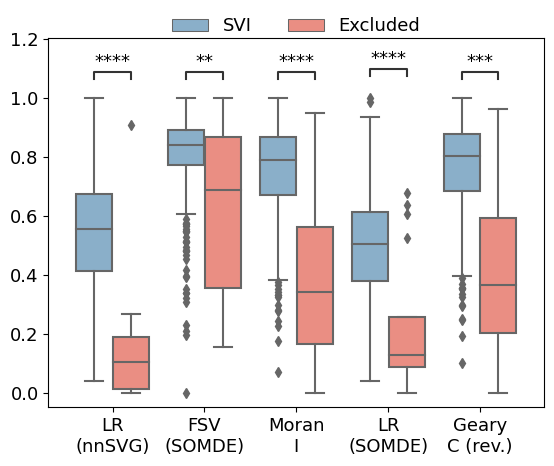

In [9]:
svi_df, svi_df_strict = op.svi.combine_SVI(idata,threshold=0.01)
plt.rcParams['font.size'] = 13
op.svi.eva_SVI(idata, svi_df_strict)

100%|██████████| 1000/1000 [00:14<00:00, 69.61/s]


Human KEGG_2021_Human
Using human LR pair dataset.
50
0.5608594926765691 0.41599638282556195 0.3376335680803844


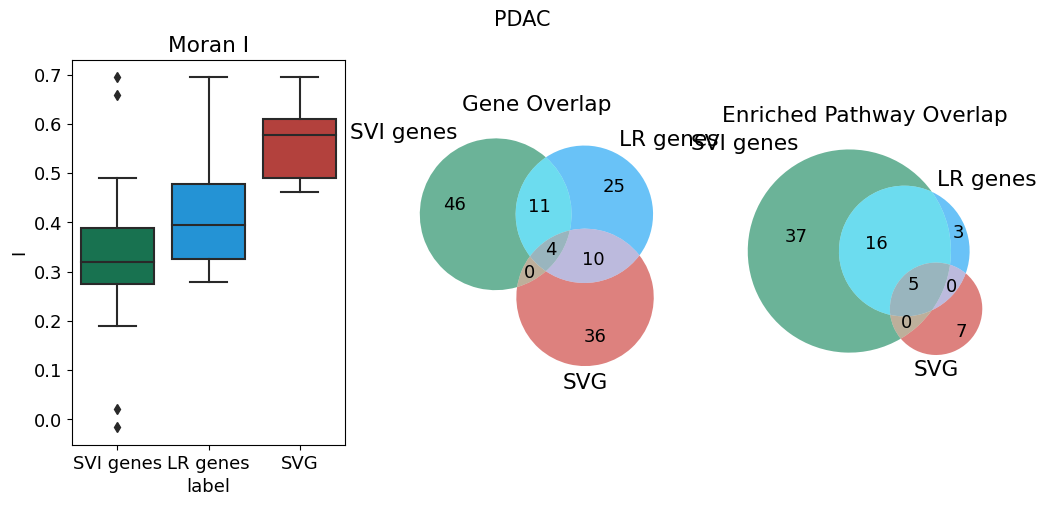

In [10]:
op.util.adata_moranI(adata, out_f=out_f)
plt.rcParams['font.size'] = 13
merged_df,lri_pw_list,gene_lr_list,gene_pw_list = op.vis.svg_svi_relation(adata, idata, title='PDAC', is_human=adata.uns['is_human'], top=50)

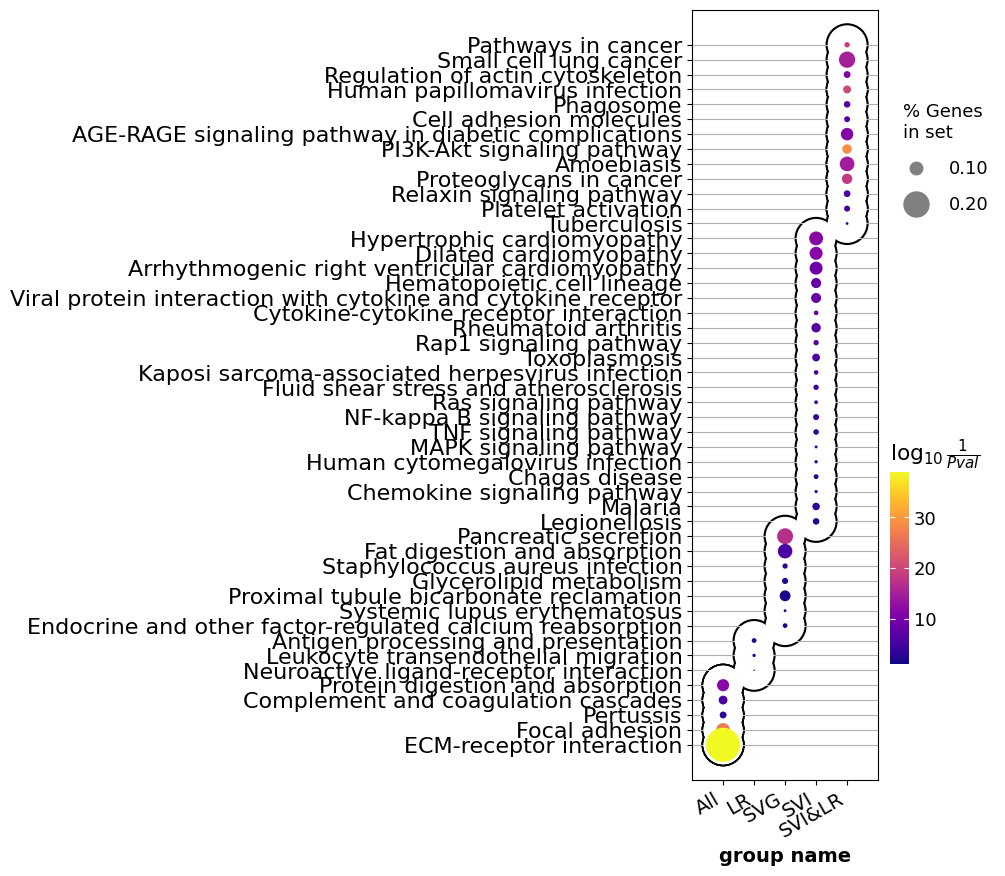

In [12]:
import gseapy
membership=pd.get_dummies(merged_df.set_index('Term')['group']).groupby('Term').sum().astype(str).agg('-'.join, axis=1)
merged_df['group name'] = membership.loc[merged_df.Term].to_numpy()
rename_dict = {
    '1-0-0': 'LR', '1-0-1':'SVI&LR', '0-0-1':'SVI', '1-1-1':'All', '0-1-0':'SVG', '0-1-1':'SVI&SVG'
}
merged_df['group name'] = merged_df['group name'] .astype('category').cat.rename_categories(rename_dict).to_numpy()
op.vis.enrichment(merged_df,x_key='group name', cutoff=0.05, top_term=20,size=15)

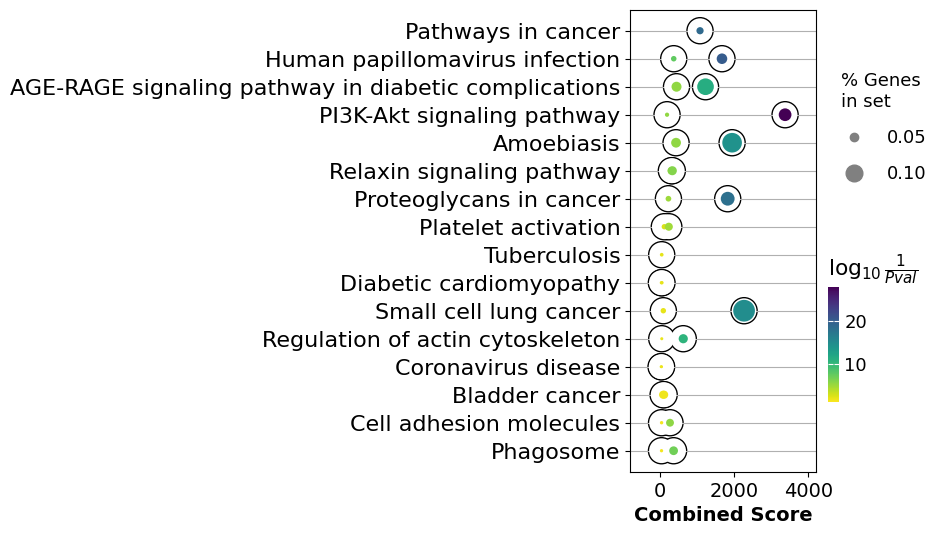

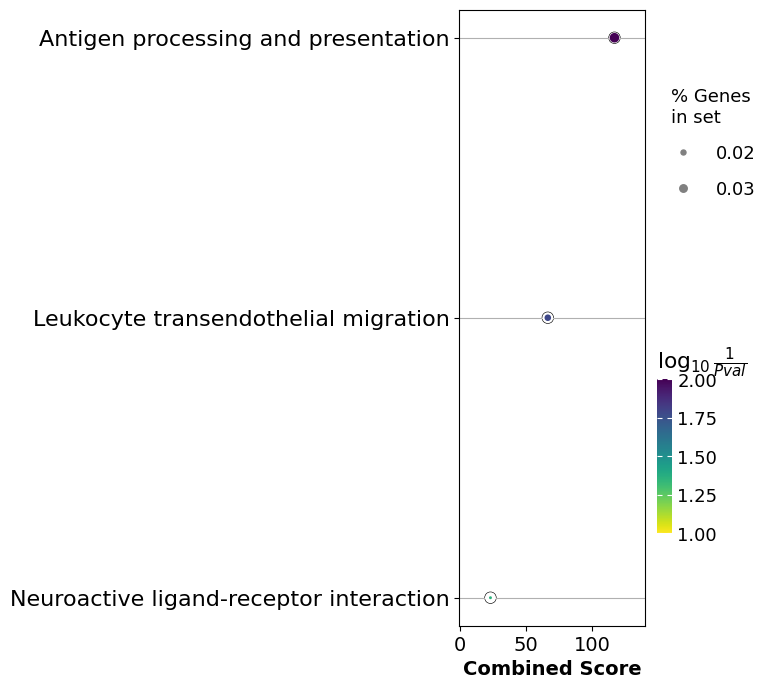

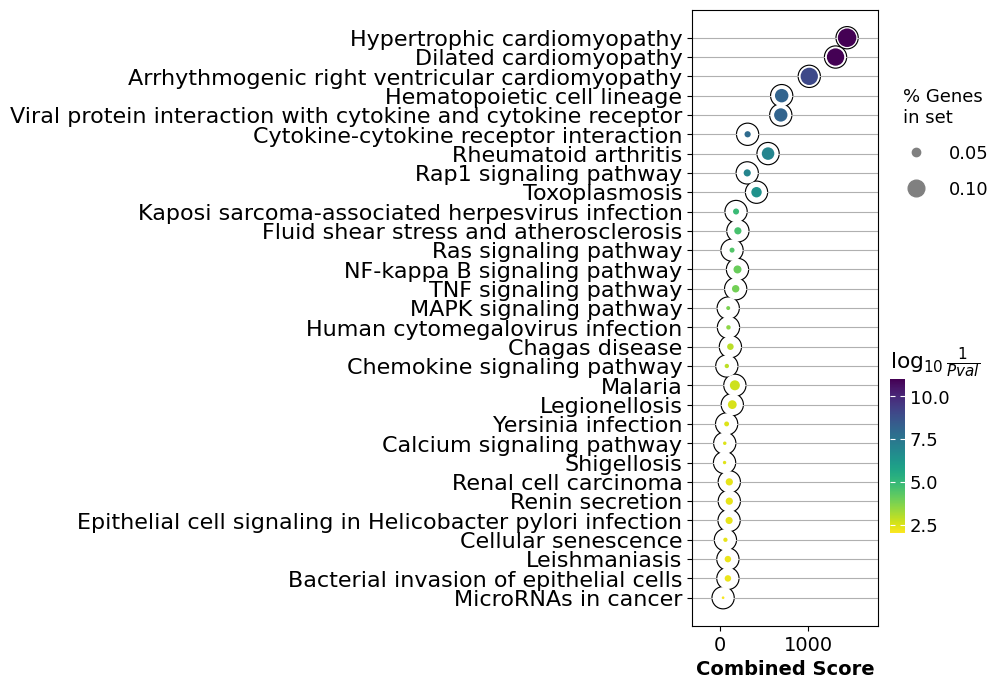

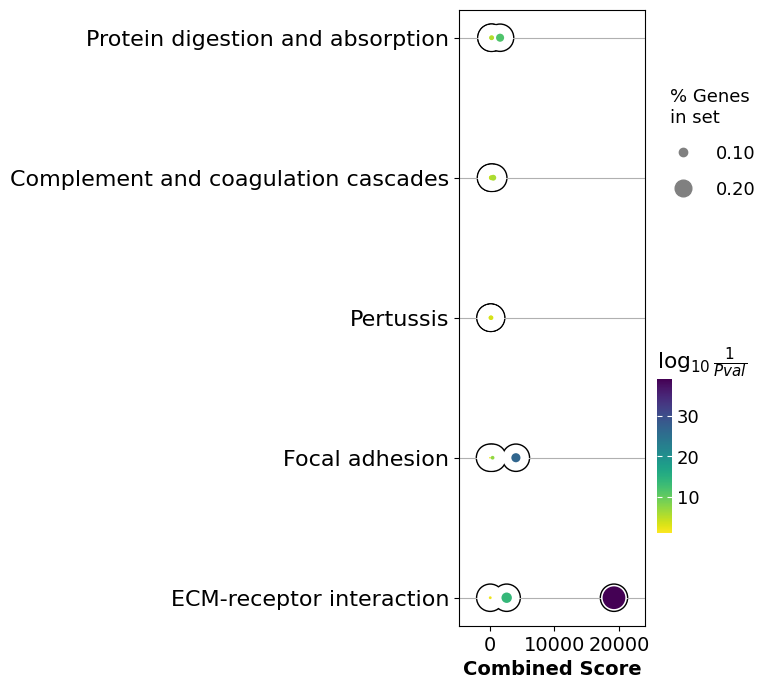

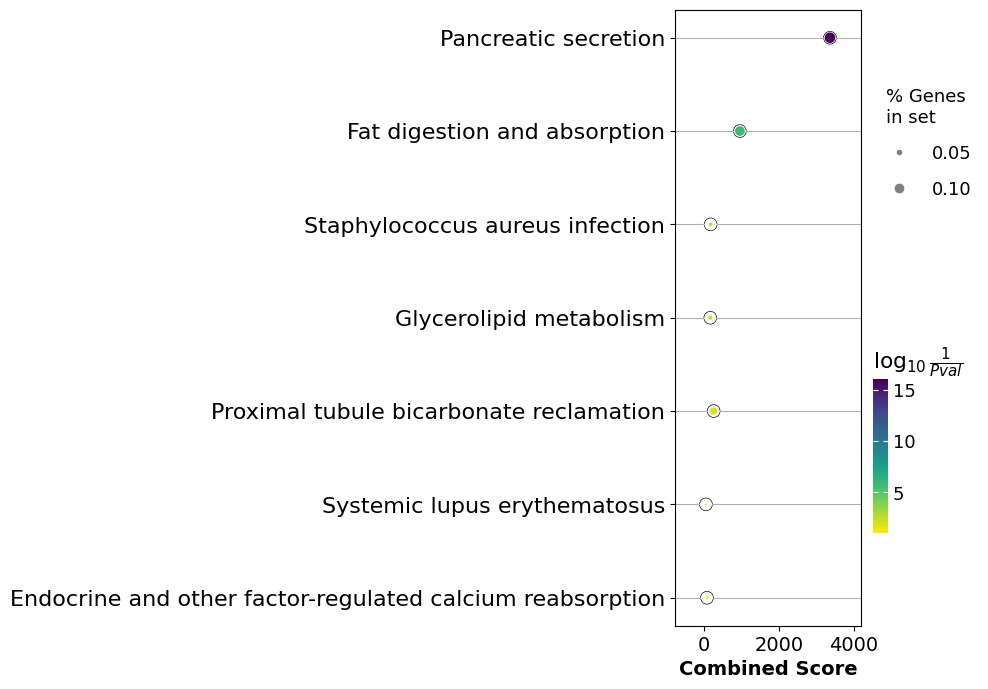

In [13]:
import gseapy
membership=pd.get_dummies(merged_df.set_index('Term')['group']).groupby('Term').sum().astype(str).agg('-'.join, axis=1).reset_index()
for x in membership[0].unique():
    sub_df = merged_df[merged_df.Term.isin(membership[membership[0]==x].Term)]
    if len(sub_df.Term.unique())>20:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=20, figsize=(3,8),top_term=30,show_ring=True)
    elif len(sub_df.Term.unique())>15:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=20, figsize=(3,6),top_term=30,show_ring=True)
    elif len(sub_df.Term.unique())<5:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=30, figsize=(3,8),top_term=30,show_ring=True)
    else:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=10, figsize=(3,8),top_term=30,show_ring=True)

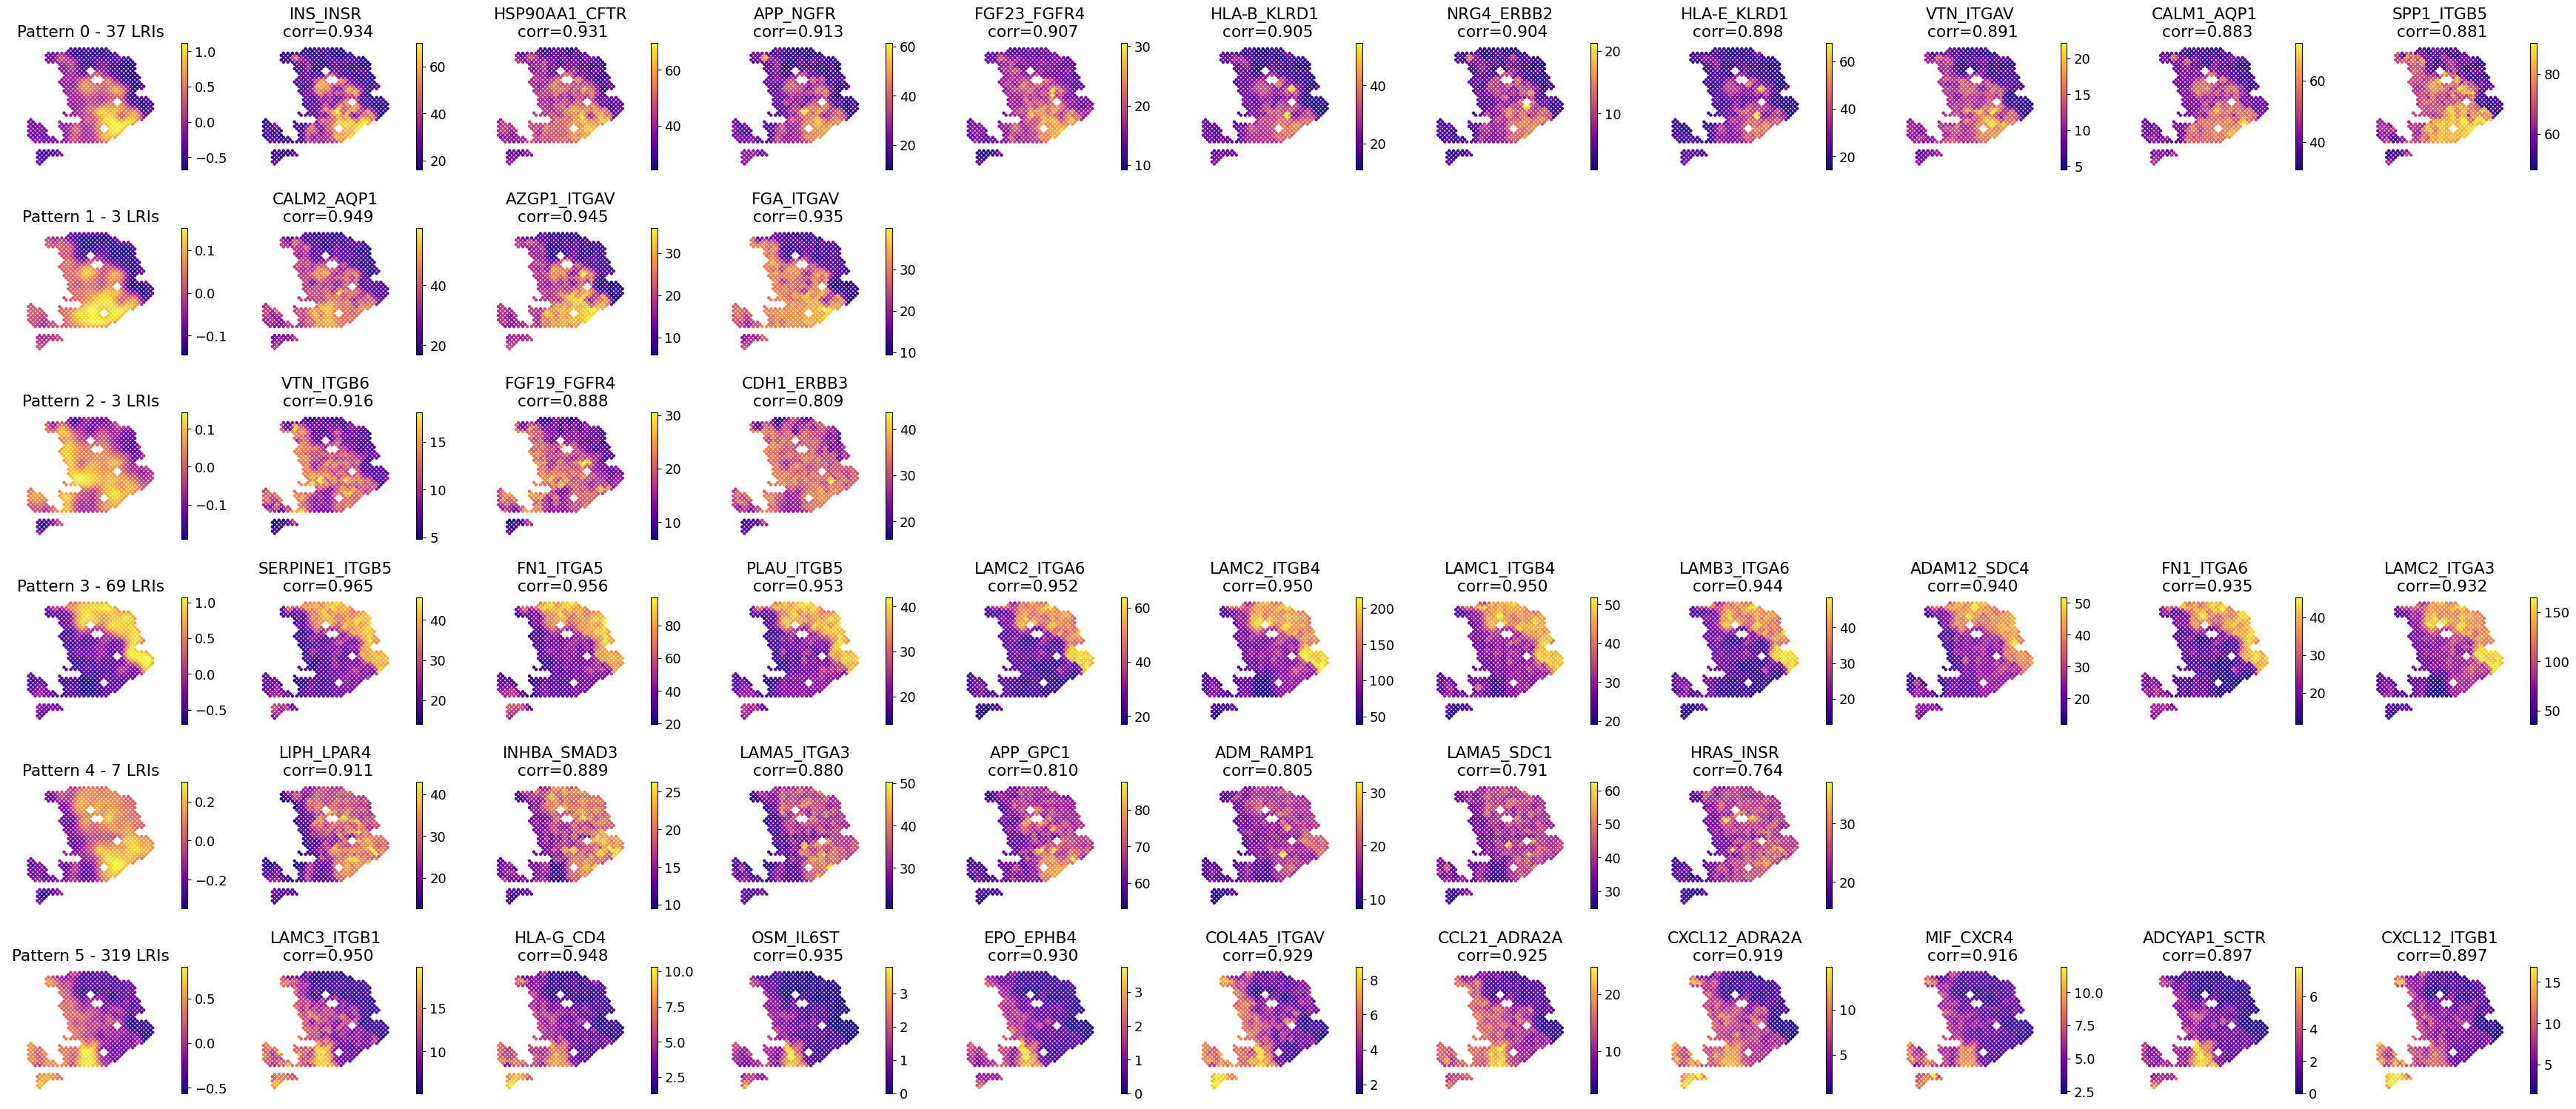

In [15]:
op.vis.pattern_LRI(idata,show_SVI=10, spot_size=10)
plt.tight_layout()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3_non-member vs. 3_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:9.879e-40 U_stat=9.600e+01
4_non-member vs. 4_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:3.490e-06 U_stat=1.600e+01
5_non-member vs. 5_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.167e-37 U_stat=5.130e+03
2_non-member vs. 2_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.525e-03 U_stat=5.000e+00
0_non-member vs. 0_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:4.163e-23 U_stat=1.940e+02
1_non-member vs. 1_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.482e-03 U_stat=3.000e+00


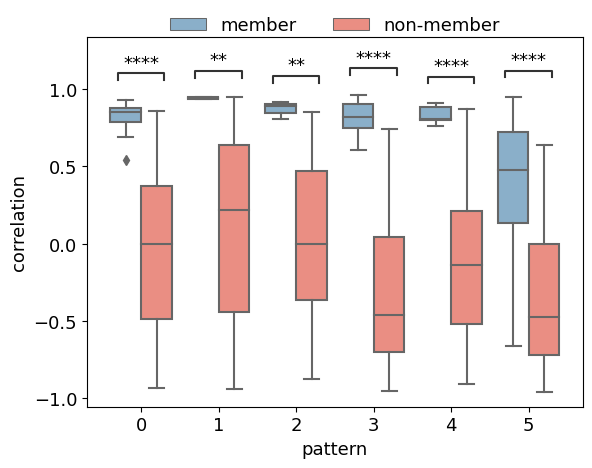

In [16]:
op.svi.eva_pattern(idata)


In [17]:
idata = idata[:, idata.var['is_svi']==1]

In [18]:
adata, adata_lri, adata_pattern = op.cell_transform(idata, adata, label=adata.uns['cluster_key'])

Added key cell_pattern in idata.uns
Added key cell_score in idata.uns
Added key interaction_pattern, interaction_score in adata.obsm
Added key rank_interaction_score_groups, rank_interaction_pattern_groups in adata.uns


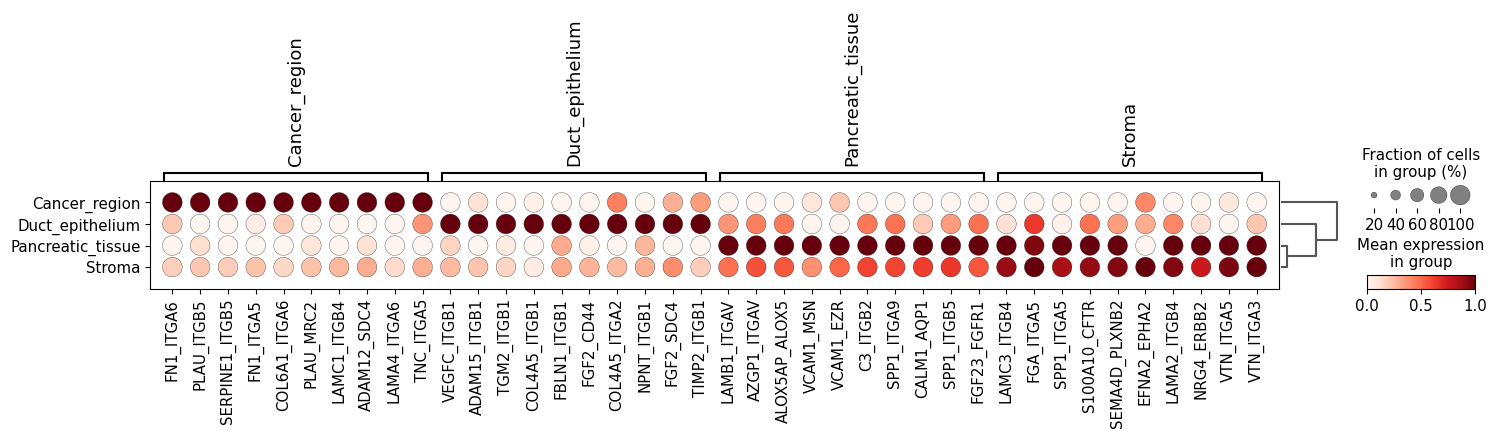

In [20]:
with plt.rc_context():
    sc.pl.rank_genes_groups_dotplot(adata_lri, standard_scale='var', show=False)

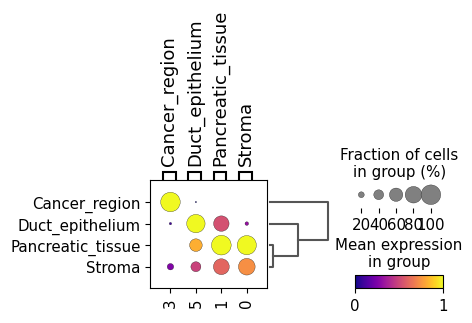

In [21]:
with plt.rc_context(): 
    sc.pl.rank_genes_groups_dotplot(adata_pattern, standard_scale='var', n_genes=1, show=False, cmap='plasma')

Using human LR pair dataset.
No objects to concatenate


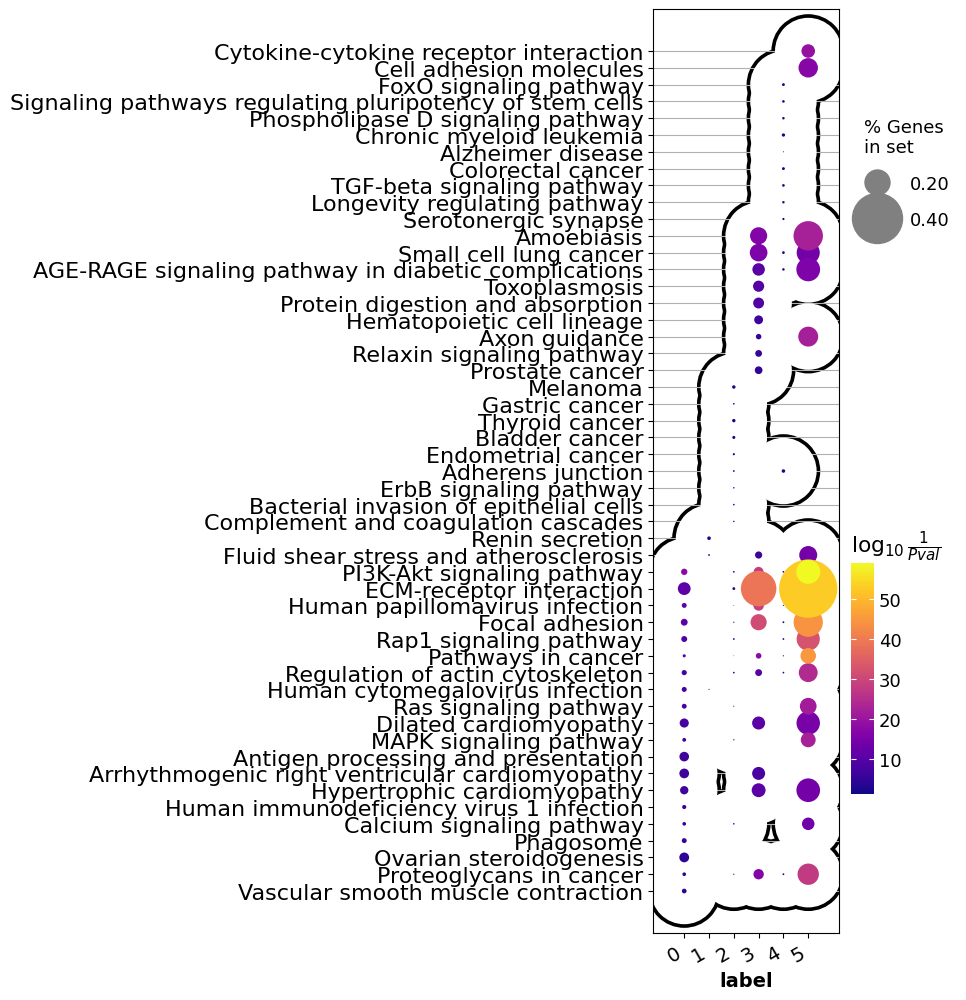

In [22]:
merged_df_edge, arr = op.er.pattern_enrichment_edge(idata,is_human=adata.uns['is_human'])
merged_df_node, arr = op.er.pattern_enrichment_node(idata,is_human=adata.uns['is_human'])
op.vis.enrichment(merged_df_node,x_key='label', cutoff=0.05, top_term=20,size=15)

deconvolution correlation

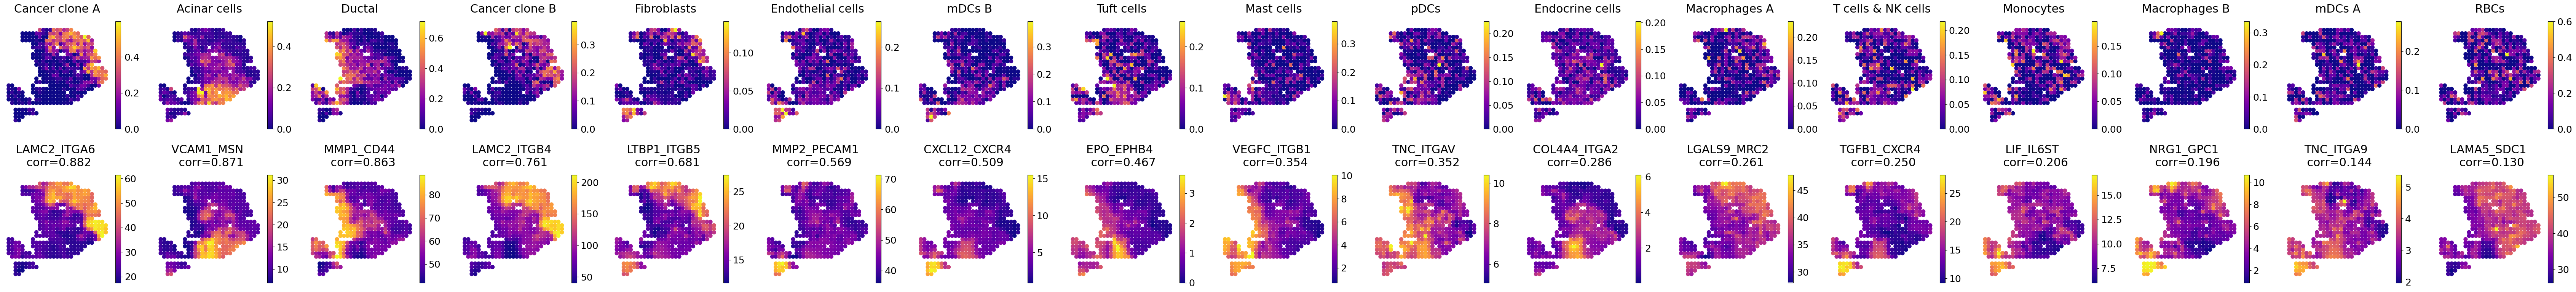

In [23]:
st_decon = adata.obsm['deconvolution']
st_decon_org = st_decon.copy()
decon_corr = pd.concat([st_decon, adata_lri.to_df()], axis=1).corr()[adata_lri.var_names].loc[st_decon.columns].T
decon_corr_sup = decon_corr.loc[decon_corr.idxmax()] 
decon_corr = decon_corr[decon_corr_sup.columns[np.argsort(-decon_corr_sup.to_numpy().diagonal())]]
decon_corr_sup = decon_corr.loc[decon_corr.idxmax()] 
plt.rcParams.update({'font.size': 18})
st_decon = st_decon_org.copy()
celtypes = decon_corr_sup.columns
st_decon = pd.concat([idata.uns['cell_meta'][['x', 'y']], st_decon], axis=1)
plt.figure(figsize=(len(celtypes)*4, 8))
base = 1
for i in celtypes:
    plt.subplot(2, len(celtypes), base)
    # sns.scatterplot(st_decon, x='x', y='y', hue=i, s=10, linewidth=0)
    im=plt.scatter(st_decon['x'],st_decon['y'], c=st_decon[i], s=50, cmap='plasma')
    plt.colorbar(im,fraction=0.046, pad=0.04)

    plt.axis('equal')
    plt.axis('off')
    plt.title(i.replace('_', ' '))
    base += 1
    
corrs = decon_corr_sup.to_numpy().diagonal()

marker_score = adata_lri.to_df()[decon_corr_sup.index]
marker_score = pd.concat([adata_lri.obs[['x', 'y']], marker_score], axis=1)
for i in range(len(decon_corr_sup.index)):
    plt.subplot(2, len(celtypes), base)
    im=plt.scatter(marker_score['x'],marker_score['y'], c=marker_score[decon_corr_sup.index[i]].to_numpy(), s=50, cmap='plasma')
    # sns.scatterplot(marker_score, x='x', y='y', hue=i, s=10, linewidth=0)
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'{decon_corr_sup.index[i]} \n corr={"%.3f" % corrs[i]}')
    base += 1

plt.tight_layout()
